In [238]:
import numpy as np
import pandas as pd

### Today i will be exploring the use of logistic regression in identifying sentiment from a corpus

In [239]:

###read in the dataset files we will be using
WEdf = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=False)
amazondf = pd.read_csv('amazon_cells_labelled.txt', sep= "\t" , header=None, names=["Sentence", "sentiment_scr"])
imdbdf = pd.read_csv('imdb_labelled.txt', sep= "\t" , header=None, names=["Sentence", "sentiment_scr"])
yelpdf = pd.read_csv('yelp_labelled.txt', sep= "\t" , header=None, names=["Sentence", "sentiment_scr"])

In [240]:
##explore the dataset
WEdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Remove the unneeded columns from the WE dataframe (we only care about the age, text, rating and postive feedback columns

In [241]:
 ###remove unnneeded columns for prediction
    
 WEdf.drop(['Unnamed: 0', 'Clothing ID', 'Title',
       'Recommended IND', 'Division Name',
       'Department Name', 'Class Name'], axis = 1, inplace= True)


In [242]:
WEdf

,Age,Review Text,Rating,Positive Feedback Count
0,33,Absolutely wonderful - silky and sexy and comf...,4,0
1,34,Love this dress! it's sooo pretty. i happene...,5,4
2,60,I had such high hopes for this dress and reall...,3,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,0
4,47,This shirt is very flattering to all due to th...,5,6
...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,0
23482,48,"It reminds me of maternity clothes. soft, stre...",3,0
23483,31,"This fit well, but the top was very see throug...",3,1
23484,28,I bought this dress for a wedding i have this ...,3,2


In [243]:
PostiveCounts =  (WEdf['Positive Feedback Count'] > 1).value_counts()

In [244]:
###count of postive and negative sentiment labels
PostiveCounts

False    15219
True      8267
Name: Positive Feedback Count, dtype: int64

### What should we base sentitment on?

By exploring the column postive feedback count we can assume that this would be a good measure for sentiment, by exploring all positive feedback count less than we can see that this won't be a good measure to measure review text against, by viewing the dataframe, we can see commonly used postive sentiment words mixed into the below dataframe

In [245]:
WEdf.loc[WEdf['Positive Feedback Count'] < 1, 'Review Text']

0        Absolutely wonderful - silky and sexy and comf...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
8        I love this dress. i usually get an xs but it ...
9        I'm 5"5' and 125 lbs. i ordered the s petite t...
                               ...                        
23478    I was surprised at the positive reviews for th...
23479    So i wasn't sure about ordering this skirt bec...
23480                                                  NaN
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
Name: Review Text, Length: 11176, dtype: object

From the looks of it just solely focusing on postive feedback count might make our model obsilite by looking at the postive feedback for the first entry on the list, we can see that this is incorrectly catorgrized as not having postive sentiment

In [246]:
WEdf.loc[WEdf['Positive Feedback Count'] < 1, 'Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline  

Let's view how the ratings vs postive feedback would look like, prehaps its better to incorparte both of these or a combination of them to better represent sentiment

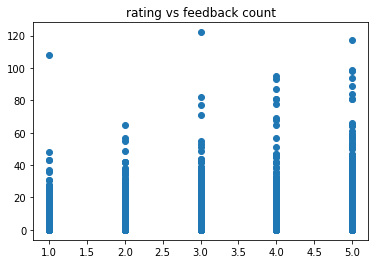

In [248]:

plt.title('rating vs feedback count')
plt.scatter(WEdf['Rating'], WEdf['Positive Feedback Count'])

By looking at the rating vs feedback count we can see that it's not possible to incorporate the both of them due to badly rated reviews having different amounts of feedback, therefore let'ss conclude that ratings under or equal to 3 is negative whereas 4-5 is positive

### Extending the dataset to include more diverese domian for sentiment analysis

In [249]:
 len(amazondf),  len(imdbdf),  len(yelpdf)

(1000, 748, 1000)

In [250]:
 AllSentences = amazondf.append(imdbdf)
    
 AllSentences = AllSentences.append(yelpdf)

In [251]:
len(AllSentences)

2748

In [252]:
AllSentences

,Sentence,sentiment_scr
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Now that we have the AllSentences dataframe we need to add the other dataframe to it after applying transformations to rating and adding a new column

### Preprocessing the dataframe to add sentiment

just as stated before rating with 3 or less will be negative sentiment whereas rating 4 or more is postive

In [253]:
###where rating is less than 3 make it equal to 0
WEdf['sentiment_scr'] = np.where(WEdf['Rating'] <= 3, 0, WEdf['Rating'])

In [254]:
WEdf

,Age,Review Text,Rating,Positive Feedback Count,sentiment_scr
0,33,Absolutely wonderful - silky and sexy and comf...,4,0,4
1,34,Love this dress! it's sooo pretty. i happene...,5,4,5
2,60,I had such high hopes for this dress and reall...,3,0,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,0,5
4,47,This shirt is very flattering to all due to th...,5,6,5
...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,0,5
23482,48,"It reminds me of maternity clothes. soft, stre...",3,0,0
23483,31,"This fit well, but the top was very see throug...",3,1,0
23484,28,I bought this dress for a wedding i have this ...,3,2,0


In [255]:
##where rating is greater than 3 make it equal to 1 on the sentiment_scr column
WEdf['sentiment_scr'] = np.where(WEdf['sentiment_scr'] > 3, 1, WEdf['sentiment_scr'])

In [256]:
WEdf

,Age,Review Text,Rating,Positive Feedback Count,sentiment_scr
0,33,Absolutely wonderful - silky and sexy and comf...,4,0,1
1,34,Love this dress! it's sooo pretty. i happene...,5,4,1
2,60,I had such high hopes for this dress and reall...,3,0,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,0,1
4,47,This shirt is very flattering to all due to th...,5,6,1
...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,0,1
23482,48,"It reminds me of maternity clothes. soft, stre...",3,0,0
23483,31,"This fit well, but the top was very see throug...",3,1,0
23484,28,I bought this dress for a wedding i have this ...,3,2,0


In [257]:
WEdf['sentiment_scr'].value_counts()

1    18208
0     5278
Name: sentiment_scr, dtype: int64

From this we can see that the encoding has worked, it has given us 18k examples of positive sentiment whereas 5278 negative sentiments, lets view some of the sentences in the minority class

In [258]:
WEdf.loc[WEdf['sentiment_scr'] == 0, 'Review Text']

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
14       This is a nice choice for holiday gatherings. ...
16       Material and color is nice.  the leg opening i...
                               ...                        
23475    Cute dress but not for me.  the waist is too h...
23478    I was surprised at the positive reviews for th...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
Name: Review Text, Length: 5278, dtype: object

From what we  can see they seem to have negative connations, let's further look into this

In [259]:
WEdf.loc[WEdf['sentiment_scr'] == 0, 'Review Text'][5]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

### Preprocessing last steps

rename the columns so that it has the same names as the other df

In [260]:
WEclean = WEdf[['Review Text' , 'sentiment_scr']]

In [261]:
WEclean = WEclean.rename(columns={"Review Text": "Sentence"})

In [262]:
WEclean.columns

Index(['Sentence', 'sentiment_scr'], dtype='object')

In [263]:
###append the newly cleaned sentences to the overall df
AllSentences = AllSentences.append(WEclean)

In [264]:
len(AllSentences)

26234

In [265]:
AllSentences['Sentence']= AllSentences['Sentence'].astype(str)

In [266]:
AllSentences['Sentence'] = AllSentences['Sentence'].map(lambda x: x.lower())

Now to process sentences so you can have it in feature form for regression

In [267]:
AllSentences['Sentence'][23485]

'this dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!'

Drop the NAN of review column since that won't add any improvement to the model

In [268]:
  AllSentences = AllSentences.dropna(subset=['Sentence'])

In [269]:
len(AllSentences), AllSentences

(26234,                                                 Sentence  sentiment_scr
 0      so there is no way for me to plug it in here i...              0
 1                            good case, excellent value.              1
 2                                 great for the jawbone.              1
 3      tied to charger for conversations lasting more...              0
 4                                      the mic is great.              1
 ...                                                  ...            ...
 23481  i was very happy to snag this dress at such a ...              1
 23482  it reminds me of maternity clothes. soft, stre...              0
 23483  this fit well, but the top was very see throug...              0
 23484  i bought this dress for a wedding i have this ...              0
 23485  this dress in a lovely platinum is feminine an...              1
 
 [26234 rows x 2 columns])

In [270]:
AllSentences.columns

Index(['Sentence', 'sentiment_scr'], dtype='object')

In [271]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Removal of stop words from the corpus

In [272]:
AllSentences['Sentences_without_stopwords'] = AllSentences['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [273]:
AllSentences

,Sentence,sentiment_scr,Sentences_without_stopwords
0,so there is no way for me to plug it in here i...,0,way plug us unless go converter.
1,"good case, excellent value.",1,"good case, excellent value."
2,great for the jawbone.,1,great jawbone.
3,tied to charger for conversations lasting more...,0,tied charger conversations lasting 45 minutes....
4,the mic is great.,1,mic great.
...,...,...,...
23481,i was very happy to snag this dress at such a ...,1,happy snag dress great price! easy slip flatte...
23482,"it reminds me of maternity clothes. soft, stre...",0,"reminds maternity clothes. soft, stretchy, shi..."
23483,"this fit well, but the top was very see throug...",0,"fit well, top see through. never would worked ..."
23484,i bought this dress for a wedding i have this ...,0,"bought dress wedding summer, cute. unfortunate..."


Remove punctuation from corpus

In [274]:
import re

In [275]:
AllSentences['Sentences_without_stopwords_punc'] = AllSentences['Sentences_without_stopwords'].apply(lambda x: re.sub(r'[^\w\s]', '',x))
AllSentences['Sentences_without_stopwords_punc'] = AllSentences['Sentences_without_stopwords'].apply(lambda x: re.sub(r'[_]', '',x))
AllSentences['Sentences_without_stopwords_punc'] = AllSentences['Sentences_without_stopwords_punc'].apply(lambda x: re.sub(r'\d+', '',x))

In [276]:
AllSentences['Sentences_without_stopwords_punc']

0                         way plug us unless go converter.
1                              good case, excellent value.
2                                           great jawbone.
3        tied charger conversations lasting  minutes.ma...
4                                               mic great.
                               ...                        
23481    happy snag dress great price! easy slip flatte...
23482    reminds maternity clothes. soft, stretchy, shi...
23483    fit well, top see through. never would worked ...
23484    bought dress wedding summer, cute. unfortunate...
23485    dress lovely platinum feminine fits perfectly,...
Name: Sentences_without_stopwords_punc, Length: 26234, dtype: object

In [277]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [278]:
AllSentences['Sentences_without_stopwords_punc'].count()

26234

In [279]:
AllSentences['Sentences_without_stopwords_punc'].str.contains("nan").count()

26234

In [280]:
 X = AllSentences['Sentences_without_stopwords_punc']
 Y = AllSentences['sentiment_scr']
print(X)

0                         way plug us unless go converter.
1                              good case, excellent value.
2                                           great jawbone.
3        tied charger conversations lasting  minutes.ma...
4                                               mic great.
                               ...                        
23481    happy snag dress great price! easy slip flatte...
23482    reminds maternity clothes. soft, stretchy, shi...
23483    fit well, top see through. never would worked ...
23484    bought dress wedding summer, cute. unfortunate...
23485    dress lovely platinum feminine fits perfectly,...
Name: Sentences_without_stopwords_punc, Length: 26234, dtype: object


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [282]:
cv = CountVectorizer(binary=True, stop_words= ['nan'])

In [283]:
cv.fit(X_train)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=['nan'],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [284]:
cv.get_feature_names()

['aa',
 'aaaaaaamazing',
 'aaaahmazing',
 'aaaahs',
 'aaahed',
 'aailiyah',
 'ab',
 'abandoned',
 'abbey',
 'abby',
 'abck',
 'abdomen',
 'abdominal',
 'abercrombie',
 'abhor',
 'ability',
 'abject',
 'able',
 'abo',
 'abou',
 'abound',
 'about',
 'above',
 'abroad',
 'abruptly',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'abstract',
 'abstruse',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'abundant',
 'abused',
 'abut',
 'abysmal',
 'ac',
 'acacia',
 'academy',
 'accent',
 'accented',
 'accenting',
 'accents',
 'accentuate',
 'accentuatea',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'acceptably',
 'accepted',
 'accepts',
 'access',
 'accessible',
 'accessing',
 'accesso',
 'accessories',
 'accessorize',
 'accessorized',
 'accessorizer',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'acco',
 'accomadate',
 'accommodate',
 'accommoda

In [285]:
cv.get_feature_names()

['aa',
 'aaaaaaamazing',
 'aaaahmazing',
 'aaaahs',
 'aaahed',
 'aailiyah',
 'ab',
 'abandoned',
 'abbey',
 'abby',
 'abck',
 'abdomen',
 'abdominal',
 'abercrombie',
 'abhor',
 'ability',
 'abject',
 'able',
 'abo',
 'abou',
 'abound',
 'about',
 'above',
 'abroad',
 'abruptly',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'abstract',
 'abstruse',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'abundant',
 'abused',
 'abut',
 'abysmal',
 'ac',
 'acacia',
 'academy',
 'accent',
 'accented',
 'accenting',
 'accents',
 'accentuate',
 'accentuatea',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'acceptably',
 'accepted',
 'accepts',
 'access',
 'accessible',
 'accessing',
 'accesso',
 'accessories',
 'accessorize',
 'accessorized',
 'accessorizer',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'acco',
 'accomadate',
 'accommodate',
 'accommoda

In [286]:
X_vector = cv.transform(X_train)
X_vector_test = cv.transform(X_test)

# training the classifier



In [287]:
from sklearn.linear_model import LogisticRegression

In [288]:
lr = LogisticRegression()

In [289]:
lr.fit(X_vector,y_train)

C:\Users\Darman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [290]:
    from sklearn.metrics import accuracy_score

In [291]:
    
### finale accuracy on test set
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, clf.predict(X_vector_test)))

Final Accuracy: 0.8605005717189683


### Top 5 features for a postive and negative sentiment

In [292]:
###find the coeff from the countvectorizor
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), clf.coef_[0]
    )
}

###sort the list based on higher the coeff = better the sentiment ##set reverse == true to get the 
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    ###print only the 5 best 
  

('pleased', 1.8599116646031295)
('paired', 1.8173043166022451)
('highly', 1.8147479327178078)
('hesitant', 1.7730393660765735)
('compliments', 1.6993721195263911)


In [293]:
### find the best negatice features
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

('disappointing', -2.3847787129950158)
('worst', -2.3225466943287842)
('awful', -2.2763615735598965)
('defective', -2.0057034532508355)
('slow', -1.9271598137654162)


# Prediction on unseen data

In [294]:
###two sentences when read have a clear distinction in sentiment
s = ['this fits well but i did highly like the colour and compliments my eyes']
s2 = ['i absolutely hated it there, i will never go back again and they will not have me as a customer' ]

In [295]:
##transform using the countvectorizor
s_tf = cv.transform(s)
s2_tf = cv.transform(s2)

In [296]:
##predict the probablity of being part of labelled class
clf.predict_proba(s_tf)


array([[0.00279506, 0.99720494]])

In [297]:
clf.predict_proba(s2_tf)

array([[0.84956952, 0.15043048]])